In [1]:
import datetime
import numpy as np
from matplotlib import cm, pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from pandas_datareader import data
import ta

In [2]:
from __future__ import print_function
import keras
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

Using TensorFlow backend.


In [4]:
df=pd.read_csv("Stock-Data/DJIA.csv")
print(len(df))

7559


In [4]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
7554,2019-12-24,28576.800781,28503.210938,28572.570312,28515.449219,86150000,28515.449219
7555,2019-12-26,28624.099609,28535.150391,28539.460938,28621.390625,155970000,28621.390625
7556,2019-12-27,28701.660156,28608.980469,28675.339844,28645.259766,182280000,28645.259766
7557,2019-12-30,28664.689453,28428.980469,28654.759766,28462.140625,181600000,28462.140625
7558,2019-12-31,28547.349609,28376.490234,28414.640625,28538.439453,193340000,28538.439453


In [5]:
df['Date']= pd.to_datetime(df["Date"])
df['weekday'] = df['Date'].dt.dayofweek

In [6]:
df['rsi']=ta.momentum.rsi(df["Close"], n=14, fillna=False)
df['r']=ta.momentum.wr(df["High"], df["Low"], df["Close"], lbp=14, fillna=False)
df['cci']=ta.trend.cci(df["High"], df["Low"], df["Close"], n=20, c=0.015, fillna=False) 

In [7]:
df['rsitf']=np.where(df['rsi']>=70,2,(np.where(df['rsi']<=30,1,0)))

In [8]:
df['rtf']=np.where(df['r']>=-20,2,(np.where(df['r']<=-80,1,0)))

In [9]:
df['ccitf']=np.where(df['cci']<=-100,2,(np.where(df['cci']>=100,1,0)))

In [10]:
df['mom1']=(df['Close']-df['Close'].shift(1))/df['Close'].shift(1)*100
df['mom2']=(df['Close']-df['Close'].shift(2))/df['Close'].shift(2)*100
df['mom3']=(df['Close']-df['Close'].shift(3))/df['Close'].shift(3)*100

In [11]:
df["vc1"]=(df["Volume"]-df["Volume"].shift(1))/df["Volume"].shift(1)*100
df["vc2"]=(df["Volume"]-df["Volume"].shift(2))/df["Volume"].shift(2)*100
df["vc3"]=(df["Volume"]-df["Volume"].shift(3))/df["Volume"].shift(3)*100

In [12]:
df["ho"]=(((df.High-df.Open)/df.Open)*100)
df["lo"]=(((df.Open-df.Low)/df.Open)*100)
df["co"]=(((df.Open-df.Close)/df.Open)*100)
df["hl"]=(((df.High-df.Low)/df.Low)*100)

In [13]:
df['non_Trading']=((df['Close']-df['Open'].shift(-1))/df['Close'])*100

In [14]:
df['sma5']=df.Close.rolling(window=5).mean()
df['sma10']=df.Close.rolling(window=10).mean()
df['sma15']=df.Close.rolling(window=15).mean()
df['sma20']=df.Close.rolling(window=20).mean()
df['sma25']=df.Close.rolling(window=25).mean()

In [15]:
df['ema5']=df.Close.ewm(span=5, adjust=False).mean()
df['ema10']=df.Close.ewm(span=10, adjust=False).mean()
df['ema15']=df.Close.ewm(span=15, adjust=False).mean()
df['ema20']=df.Close.ewm(span=20, adjust=False).mean()
df['ema25']=df.Close.ewm(span=25, adjust=False).mean()

In [16]:
df['label']=np.where(df['Close'].shift(-1)>df['Close'],1,0)

In [17]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,weekday,rsi,r,...,sma10,sma15,sma20,sma25,ema5,ema10,ema15,ema20,ema25,label
0,1990-01-02,2811.649902,2732.510010,2748.719971,2810.149902,20680000,2810.149902,1,100.000000,-1.895378,...,NaN,NaN,NaN,NaN,2810.149902,2810.149902,2810.149902,2810.149902,2810.149902,0
1,1990-01-03,2834.040039,2786.260010,2814.199951,2809.729980,23620000,2809.729980,2,0.000000,-23.943713,...,NaN,NaN,NaN,NaN,2810.009928,2810.073553,2810.097412,2810.109910,2810.117601,0
2,1990-01-04,2821.459961,2766.419922,2804.389893,2796.080078,24370000,2796.080078,3,0.000000,-37.387915,...,NaN,NaN,NaN,NaN,2805.366645,2807.529285,2808.345245,2808.773735,2809.037791,0
3,1990-01-05,2810.149902,2758.110107,2786.899902,2773.250000,20290000,2773.250000,4,0.000000,-59.873950,...,NaN,NaN,NaN,NaN,2794.661097,2801.296688,2803.958340,2805.390522,2806.284884,1
4,1990-01-08,2803.969971,2753.409912,2761.729980,2794.370117,16610000,2794.370117,0,38.805735,-39.072107,...,NaN,NaN,NaN,NaN,2794.564103,2800.037311,2802.759812,2804.340960,2805.368364,0


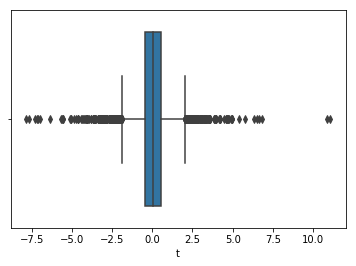

In [18]:
import seaborn as sns
df['t']=((df['Close'].shift(-1)- df['Close'])/df['Close']*100)
sns.boxplot(x=df['t'])

/home/jagdish/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


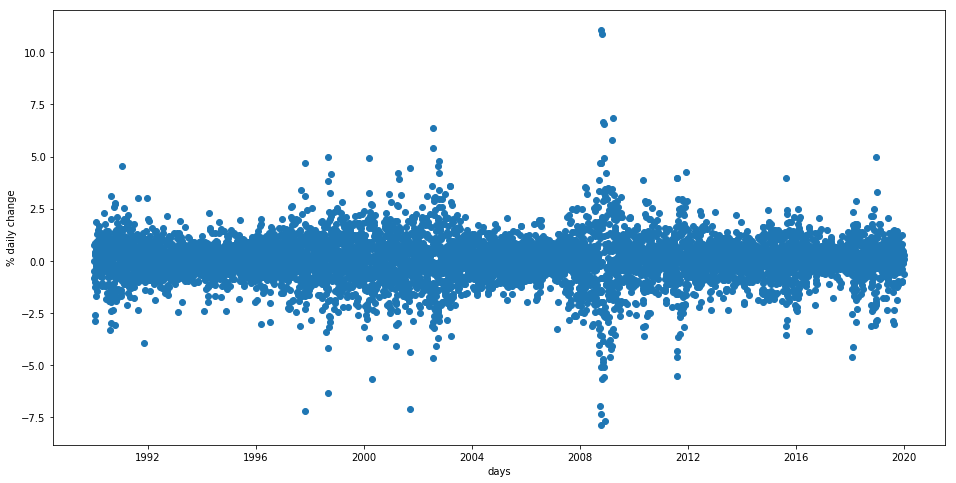

In [19]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Date'], df['t'])
ax.set_xlabel('days')
ax.set_ylabel('% daily change')
plt.show()

In [20]:
df=df.dropna() 

In [21]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['t']))
print(z)

[0.62395725 1.19864278 0.11893276 ... 0.04397885 0.64410361 0.21981742]


In [22]:
threshold = 3
print(np.where(z > 3))

(array([ 125,  239,  450, 1903, 1914, 1953, 1954, 2146, 2163, 2165, 2166,
       2170, 2172, 2181, 2197, 2504, 2547, 2553, 2554, 2575, 2700, 2737,
       2802, 2820, 2828, 2929, 2932, 2934, 3130, 3140, 3143, 3146, 3151,
       3171, 3189, 3191, 3198, 3199, 3201, 3303, 3305, 3310, 4299, 4560,
       4565, 4574, 4621, 4690, 4692, 4693, 4694, 4695, 4700, 4701, 4703,
       4705, 4706, 4708, 4710, 4712, 4713, 4715, 4717, 4719, 4721, 4726,
       4727, 4728, 4732, 4733, 4734, 4737, 4738, 4739, 4740, 4744, 4745,
       4749, 4755, 4777, 4778, 4792, 4796, 4800, 4801, 4805, 4808, 4811,
       4813, 4820, 4825, 4839, 5103, 5105, 5113, 5123, 5418, 5420, 5421,
       5422, 5423, 5428, 5452, 5486, 5500, 6436, 6437, 6439, 6648, 7054,
       7057, 7226, 7278, 7284]),)


In [23]:
df['z']=z

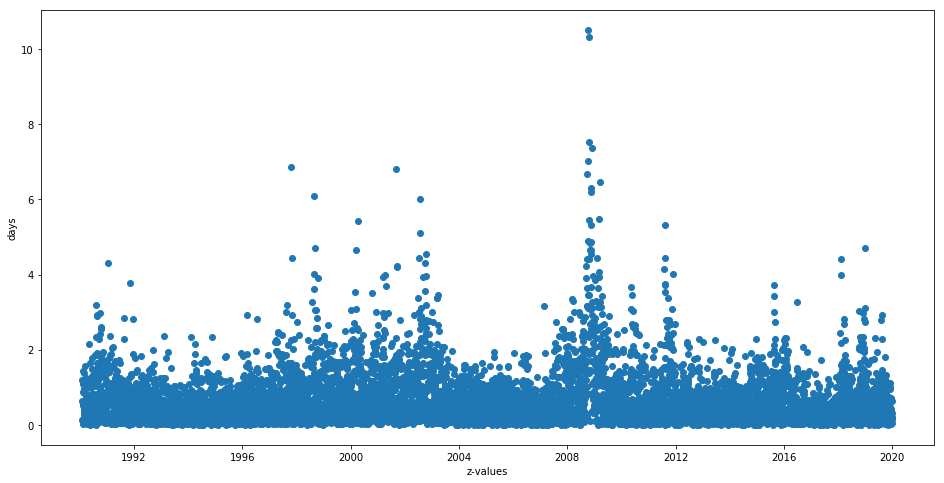

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Date'], df['z'])
ax.set_xlabel('z-values')
ax.set_ylabel('days')
plt.show()

In [25]:
# Get names of indexes for which column Age has value 30
indexNames = df[ df['z'] > 3 ].index 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [26]:
len(df)

7420

In [27]:
test=int(len(df)*0.05)

In [28]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'weekday', 'rsi', 'r', 'cci', 'rsitf', 'rtf', 'ccitf', 'mom1', 'mom2',
       'mom3', 'vc1', 'vc2', 'vc3', 'ho', 'lo', 'co', 'hl', 'non_Trading',
       'sma5', 'sma10', 'sma15', 'sma20', 'sma25', 'ema5', 'ema10', 'ema15',
       'ema20', 'ema25', 'label', 't', 'z'],
      dtype='object')

In [29]:
x=df[['Close','weekday', 'rsi', 'r', 'cci','rsitf', 'rtf', 'ccitf', 'mom1', 'mom2', 'mom3','vc1', 'vc2',
       'vc3',  'ho', 'lo', 'co', 'hl', 'sma5', 'sma10', 'sma15', 'sma20','non_Trading',
       'sma25', 'ema5', 'ema10', 'ema15', 'ema20', 'ema25',]]

In [30]:
x1=x.to_numpy()
x1.shape

(7420, 29)

In [31]:
len(x1)

7420

In [32]:
t=[]
for i in range(10,len(x1)):
    t.append(x1[i-10:i].reshape(10,29,1))

In [33]:
inputF=np.asarray(t)

In [34]:
test

371

In [35]:
inputF[:-test]

array([[[[2.62252002e+03],
         [0.00000000e+00],
         [4.19145606e+01],
         ...,
         [2.61937780e+03],
         [2.63754360e+03],
         [2.65401050e+03]],

        [[2.60631006e+03],
         [1.00000000e+00],
         [3.91729675e+01],
         ...,
         [2.61774433e+03],
         [2.63456898e+03],
         [2.65034124e+03]],

        [[2.64009009e+03],
         [2.00000000e+00],
         [4.69589424e+01],
         ...,
         [2.62053755e+03],
         [2.63509480e+03],
         [2.64955269e+03]],

        ...,

        [[2.62432007e+03],
         [2.00000000e+00],
         [4.42599074e+01],
         ...,
         [2.62532899e+03],
         [2.63339371e+03],
         [2.64343978e+03]],

        [[2.64955005e+03],
         [3.00000000e+00],
         [5.04291979e+01],
         ...,
         [2.62835662e+03],
         [2.63493241e+03],
         [2.64390980e+03]],

        [[2.63559009e+03],
         [4.00000000e+00],
         [4.73091272e+01],
         ...,
 

In [36]:
y=df[['label']][10:]

In [37]:
len(y)
y.shape

(7410, 1)

In [38]:
from keras.utils import to_categorical#one-hot encode target column
output = to_categorical(y)
output[0]

array([1., 0.], dtype=float32)

In [39]:
output.shape

(7410, 2)

In [40]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same',input_shape=(10,29,1)))
model.add(Conv2D(32, (2, 2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Conv2D(32, (2, 2), activation='relu',padding='same'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 10, 29, 32)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 29, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 29, 32)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 29, 32)         4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 29, 32)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 29, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1856)             

In [ ]:
from keras.callbacks import ModelCheckpoint
# checkpoint
filepath="models/model{epoch:02d}"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

In [ ]:
#train the model
history=model.fit(inputF[:-test], output[:-test],  epochs=100,validation_data=(inputF[-test:], output[-test:]),
                  shuffle=False,batch_size=32, callbacks=callbacks_list, verbose=1)

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [41]:
from keras.models import load_model
model = load_model("models/model61")

In [42]:
Y_pred=model.predict(inputF[-test:])
y_pred = np.argmax(Y_pred, axis=1)

In [43]:
len(y_pred)

371

In [44]:
actual=np.argmax(output[-test:], axis=1) 

In [45]:
len(actual)

371

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print('Classification Report')
target_names = ['Actual', 'Prediction']
print(classification_report(actual, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.46      0.38      0.42       164
           1       0.57      0.64      0.60       207

   micro avg       0.53      0.53      0.53       371
   macro avg       0.51      0.51      0.51       371
weighted avg       0.52      0.53      0.52       371



In [48]:
df['y_pred']=5

In [49]:
df['y_pred'][-test:]=y_pred

/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df.to_csv("afterDJIA.csv")